<a href="https://colab.research.google.com/github/asgarali429/Machine-learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['target'] = 0

df = pd.concat([df1, df2], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the DataFrame

print(df.head())

   feature1  feature2  feature3  target
0 -0.992574 -0.161346  1.192404       1
1 -0.420844 -0.551989 -0.121098       1
2 -0.045438  1.040886 -0.094035       1
3  0.898907  0.435960  0.820964       0
4  0.322272  0.060343 -1.043450       1


In [2]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [3]:
#step1-----> Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [4]:
#step2----->Find co-variance matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [5]:
#step3---->Find Eigen value and Find Eigen vector
Eigenvalue ,Eigenvector = np.linalg.eig(covariance_matrix)

In [6]:
Eigenvalue

array([1.3536065 , 0.94557084, 0.77774573])

In [7]:
Eigenvector

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [8]:
pc = Eigenvector[0:2]

In [9]:
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [10]:
pc_transposed = pc.T

In [11]:
transformed_df = np.dot(df.iloc[:,0:3],pc_transposed) #(40,3) (3,2)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.304549,0.476645,1
1,0.741715,1.023822,1
2,-0.478444,0.774372,1
3,-0.138331,-0.368372,0
4,-0.401542,1.203061,1


In [12]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

PCA is used to reduce the curse of dimensionality.In order to perform a PCA you have to follow a step---> step1.standard scaling the feature ,step2.Find a covariance in order to see how much data is spread and corealation between the feature,step3.Find the Eigen value and Eigen vector based on no of Eigen value we can decide how much no of Eigen value we need according to the data in order to reduce the dimension of data ,step 4:Then dot product of the feature and Transposed of no of Eigen value

In [13]:
wine = pd.read_csv('winequalityN - winequalityN.csv')
wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [14]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [15]:
wine.duplicated().sum()

1168

In [16]:
wine.shape

(6497, 13)

In [17]:
#first we have to remove missing value and
wine = wine.dropna()
wine.drop_duplicates(inplace=True)

<ipython-input-17-812bcbb30b16>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
wine.shape

(5295, 13)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
##Without PCA
x = wine.drop('type',axis=1)
y = wine['type']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(accuracy_score(ytest,ypred)*100)
print("KNN having features -", xtrain.shape[1])

99.33899905571295
KNN having features - 12


In [21]:
# with PCA
pca = PCA(n_components=8)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_pca,ytrain)
ypred = knn.predict(xtest_pca)
print(accuracy_score(ytest,ypred)*100)
print("KNN having features -", xtrain_pca.shape[1])


99.33899905571295
KNN having features - 8


In [22]:
pca.explained_variance_
#Eigen value

array([3.04132576, 2.64834255, 1.65135526, 1.07374019, 0.84749993,
       0.65586505, 0.54230837, 0.50921118])

In [23]:
pca.components_.shape

(8, 12)

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156])

when the data is spread 90% then it is perfect n_component

99.33899905571295
KNN having features - 12


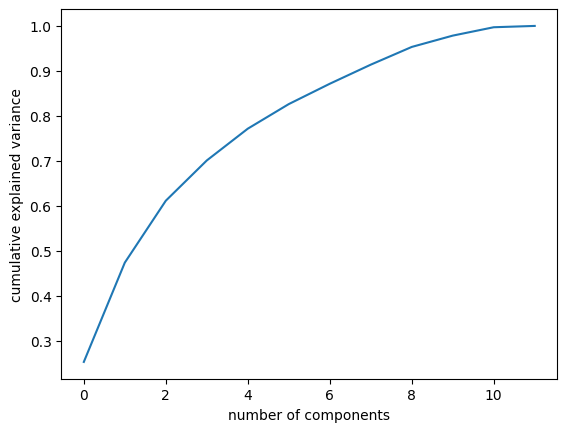

In [26]:
import matplotlib.pyplot as plt

# prompt: as you saw above graph plot till 12 feature

pca = PCA(n_components=12)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_pca,ytrain)
ypred = knn.predict(xtest_pca)
print(accuracy_score(ytest,ypred)*100)
print("KNN having features -", xtrain_pca.shape[1])

pca.explained_variance_
#Eigen value
pca.components_.shape
np.cumsum(pca.explained_variance_ratio_)
# when the data is spread 90% then it is perfect n_component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


"PCA helps reduce the number of features in our data while keeping the important information. Imagine you have a lot of data points with many different features. PCA finds the most important patterns in the data and keeps those, while getting rid of less important ones.

If, for example, we find that 90% of the important patterns can be captured by a certain number of new features (called principal components), we can choose to keep only those components. This makes our data simpler and easier to work with, while still keeping most of the important stuff.

So, PCA is like a smart way to make our data smaller and easier to understand, without losing too much valuable information."